**Student Name : Makarand More**

In [628]:
from google.colab import drive

In [629]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


***Task# 1: Import the libraries, load dataset, print shape of data, visualize the images in dataset***. 

In [630]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
seed = 7
np.random.seed(seed)

In [631]:
GDriveFilePath = "/content/drive/My Drive" #Setup Variable for File Path

In [632]:
DataTrainLabel= pd.read_csv(GDriveFilePath + "/Labels.csv")

In [633]:
DataTrainLabel.shape

(4750, 1)

In [634]:
DataTrainImage=np.load(GDriveFilePath + "/images.npy")

In [635]:
DataTrainImage.shape

(4750, 128, 128, 3)

In [636]:
# check the length of the training images for confirmation
len(DataTrainImage)

4750

In [500]:
# check the length of labels for confirmation
len(DataTrainLabel)

4750

In [501]:
DataTrainLabel.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [502]:
 label_dict= {'Loose Silky-bent':0, 'Common Chickweed':1, 'Scentless Mayweed':2, 'Small-flowered Cranesbill':3, 'Fat Hen':4, 'Charlock':5, 'Sugar beet':6, 'Cleavers':7, 'Black-grass':8, 'Shepherds Purse':9,'Maize':10, 'Common wheat':11}

*# Created two label dictionary to be use in multiple places including for Confusion matrix as it going to required classes*

In [503]:
label_dict_Reverse= {0:'Loose Silky-bent', 1:'Common Chickweed', 2:'Scentless Mayweed', 3:'Small-flowered Cranesbill', 4:'Fat Hen', 5:'Charlock', 6:'Sugar beet', 7:'Cleavers', 8:'Black-grass', 9:'Shepherds Purse',10:'Maize', 11:'Common wheat'}

In [504]:
label_dict

{'Black-grass': 8,
 'Charlock': 5,
 'Cleavers': 7,
 'Common Chickweed': 1,
 'Common wheat': 11,
 'Fat Hen': 4,
 'Loose Silky-bent': 0,
 'Maize': 10,
 'Scentless Mayweed': 2,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 3,
 'Sugar beet': 6}

In [505]:
DataTrainLabel=DataTrainLabel.replace(label_dict)

In [506]:
DataTrainLabel.value_counts()

Label
0        654
1        611
2        516
3        496
4        475
5        390
6        385
7        287
8        263
9        231
11       221
10       221
dtype: int64

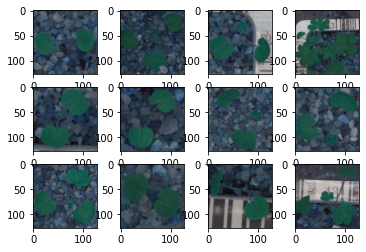

In [507]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(DataTrainImage[i])

***Task 2: Data Pre-processing a. Normalization. b. Gaussian Blurring.c. Visualize ***

In [508]:
# Normalize the data
Nor_DataTrainImage = DataTrainImage.astype('float32')/255.0 # we need to do one more time during model creation process.


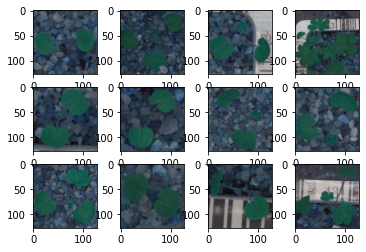

In [509]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(Nor_DataTrainImage[i])

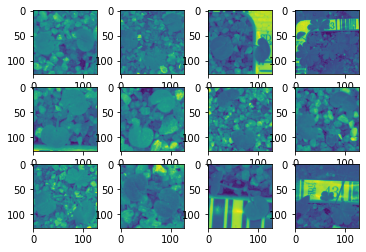

In [510]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(cv2.cvtColor(Nor_DataTrainImage[i],cv2.COLOR_BGR2GRAY)) # Convert image to grayscale just for view

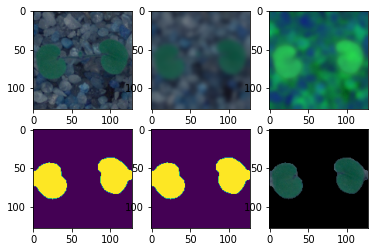

In [603]:
clearTrainImg = []
examples = []; getEx = True
#Here using I am using non normalize image data
for img in DataTrainImage: 
    # Use gaussian blur
    #blurImg = cv2.GaussianBlur(img, (5, 5), 0)   #accuracy: 0.6625
    blurImg = cv2.GaussianBlur(img, (15, 15), 0)  #accuracy increase here  
    
    # Convert to HSV image and grayscale image to see which one works better
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
   # grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
     #   plt.subplot(2, 3, 3); plt.imshow(grayImg)  # Gray image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

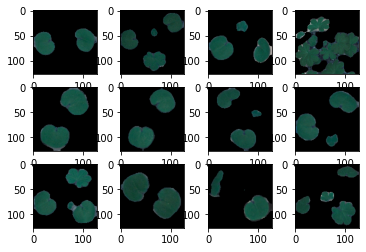

In [572]:
# Show sample result good to move ahead with clearTrainImg
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(clearTrainImg[i])

In [513]:
blurImg.shape

(128, 128, 3)

In [550]:
clearTrainImg.shape

(4750, 128, 128, 3)

**Task#3 : Make data compatible**

In [573]:
#Convert labels to one-hot-vectors.
enc = LabelBinarizer()
clearTrainLabel = enc.fit_transform(DataTrainLabel)


In [604]:
clearTrainLabel[0] #Print the label for 1st set, similar y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [605]:
#Split the dataset into training, testing, and validation set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(clearTrainImg, clearTrainLabel,test_size=0.3,random_state=seed,stratify = clearTrainLabel)
 

In [606]:
#r split test data into test and validation set with test_size = 0.5
x_test, X_val, y_test, Y_val = train_test_split(x_test,y_test, test_size = 0.5, random_state=seed)

In [607]:
print(x_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


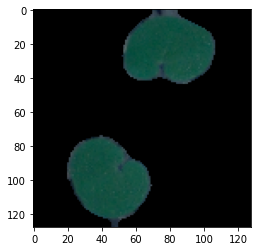

In [608]:
i = 0
image = x_train[i]
plt.imshow(image)


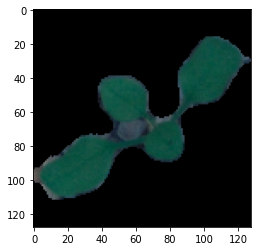

In [581]:
i = 0
image = X_val[i]
plt.imshow(image)

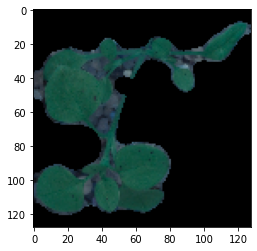

In [582]:
i = 0
image = x_test[i]
plt.imshow(image)

**Note: Above three images shows variation of data / images in test and validation alaong train**

In [583]:
print("X_train shape:", x_train.shape)
print("Images in X_train:", x_train.shape[0])
print("Images in X_test:", x_train.shape[0])
print("Max value in X_train:", x_train.max())
print("Min value in X_train:", x_train.min())
print("Y_train shape:", y_train.shape)
print("Images in Y train:", y_train.shape[0])
print("Images in Y test:", y_train.shape[0])
print("Max value in Y train:", y_train.max())
print("Min value in Y train:", y_train.min())

X_train shape: (3325, 128, 128, 3)
Images in X_train: 3325
Images in X_test: 3325
Max value in X_train: 255
Min value in X_train: 0
Y_train shape: (3325, 12)
Images in Y train: 3325
Images in Y test: 3325
Max value in Y train: 1
Min value in Y train: 0


In [584]:
x_train.shape

(3325, 128, 128, 3)

In [585]:
x_test.shape

(712, 128, 128, 3)

In [586]:
y_test.shape

(712, 12)

In [587]:
Y_val.shape

(713, 12)

**Task #4 Building CNN:**

In [609]:
#To avoide overfitting we need to create image generator which will randomly rotate, zoom, shift and flip image during the fitting of the model
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(x_train)

In [610]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=trainX.shape[1:])) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dense(12, activation='softmax')) #Check 

model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_235 (Bat (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_236 (Bat (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 28, 28, 128)     

In [611]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [612]:
#Train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [613]:
# Network structure is summarized which confirms our design was implemented correctly. Also doubel check that model looks good.
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_235 (Bat (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_236 (Bat (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 28, 28, 128)     

In [614]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
X_val= X_val.astype(('float32'))
x_train /= 255.0 # Division by 255
x_test /= 255.0
X_val /= 255.0 

In [615]:
# Use earlystopping stopping callback to the fit function is going to stop the training
#callback = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.01)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20)
#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training
checkpoint_filepath = 'weights.{epoch:02d}-{loss:.2f}.hdf5'
#'mak_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5'
model_checkpoint_callback =  ModelCheckpoint(checkpoint_filepath,
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           save_freq='epoch')


In [616]:
#Reshape Date before going to fit 
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)
X_val=X_val.reshape(X_val.shape[0], 128, 128, 3)

print(x_train.shape)
print(x_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


**Task#5 : Fit and evaluate model and print confusion matrix**

Epoch 1/35
45/45 [==============================] - 13s 265ms/step - loss: 2.5667 - accuracy: 0.3047 - val_loss: 4.8821 - val_accuracy: 0.1445

Epoch 00001: val_loss improved from inf to 4.88214, saving model to weights.01-2.13.hdf5
Epoch 2/35
45/45 [==============================] - 12s 259ms/step - loss: 1.5400 - accuracy: 0.5377 - val_loss: 9.8786 - val_accuracy: 0.1431

Epoch 00002: val_loss did not improve from 4.88214
Epoch 3/35
45/45 [==============================] - 12s 260ms/step - loss: 1.1659 - accuracy: 0.6395 - val_loss: 13.0017 - val_accuracy: 0.0449

Epoch 00003: val_loss did not improve from 4.88214
Epoch 4/35
45/45 [==============================] - 12s 263ms/step - loss: 1.1936 - accuracy: 0.6584 - val_loss: 9.6455 - val_accuracy: 0.0870

Epoch 00004: val_loss did not improve from 4.88214
Epoch 5/35
45/45 [==============================] - 12s 263ms/step - loss: 0.9452 - accuracy: 0.7037 - val_loss: 8.7146 - val_accuracy: 0.1473

Epoch 00005: val_loss did not improve

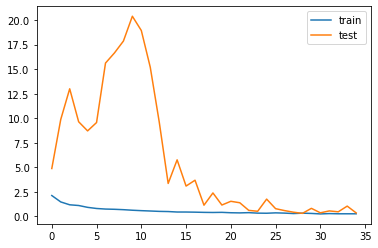

In [617]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=75),
                    epochs=35,
                    validation_data = (X_val,Y_val), 
                    shuffle=True,
                    verbose=1, callbacks=[early_stopping,model_checkpoint_callback]
                   )
                 
#The validation data-set is getting from the training data-set.
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [618]:
# Score Train model.
scores = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])

104/104 [==============================] - 1s 10ms/step - loss: 0.2039 - accuracy: 0.9242
Train loss: 0.20394648611545563
Train accuracy: 0.9242105484008789


In [619]:
# Score Test model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 10ms/step - loss: 0.3217 - accuracy: 0.8975
Test loss: 0.3217284679412842
Test accuracy: 0.8974719047546387


In [620]:
# Score validation model.
scores = model.evaluate(X_val, Y_val, verbose=1)
print('Val loss:', scores[0])
print('Val accuracy:', scores[1])

23/23 [==============================] - 0s 10ms/step - loss: 0.3624 - accuracy: 0.8920
Val loss: 0.3624236285686493
Val accuracy: 0.8920056223869324


**Note: The above score shows that the accuracy close to 90% in test and validation and close to 93% in train. As we used number of epochs = 30 or 35 compare to 40 or 50. If we may add more epochs and tune the hyper-parameters more then we can get some more improvement accuracy score**

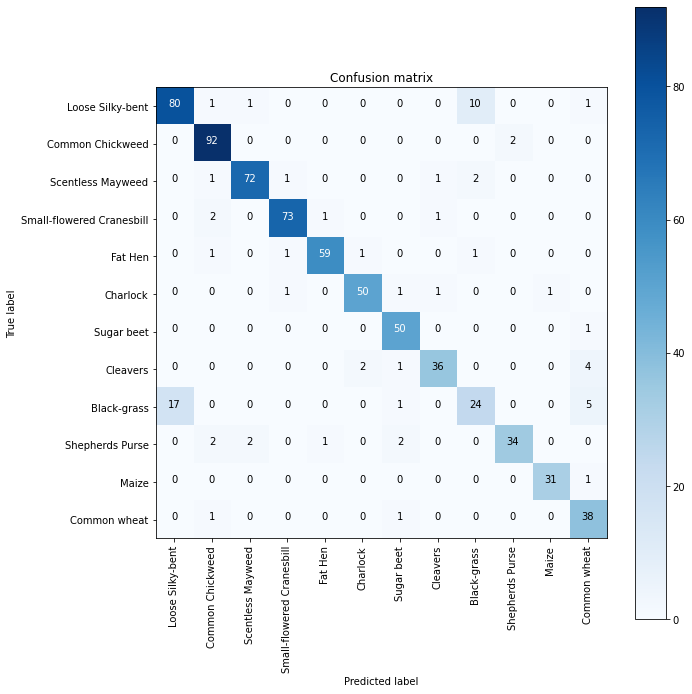

In [622]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model.predict(x_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = label_dict) 

**Task#6 : Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]**

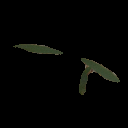

In [623]:
cv2_imshow(X_test[2])

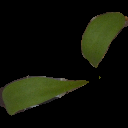

In [624]:
cv2_imshow(X_test[3])

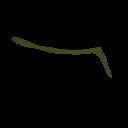

In [625]:
cv2_imshow(X_test[33])

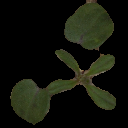

In [626]:
cv2_imshow(X_test[59])

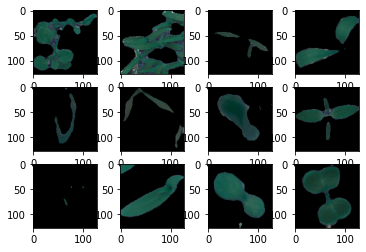

In [627]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_test[i])

Overall Summary
1.   Accuracy improved after changing hyper paramter and noise reducation -  Guassian blurring, weight initialization and HSV image
2. According to the confusion matrix, Loose Skilky-bent, Common Wheat  and Black-Grass have misclassified.There are 16 samples of Loose Skilky-bent misclassified as Black-Grass, and 23 samples of Black-Grass misclassified as Sugar Beet. Those three plants most likely having similar feature that confuse model. Additional work needed include alternative image processing techniques and data augmention to come of out those.
3. The loss is decreasing and accuracy is increasing when epoch getting larger. At the end of the epoch, the validation accuracy and the training accuracy is same. 
4.The accuracy close to 90% in test and validation and close to 93% in train. As we used number of epochs = 30 or 35 compare to 40 or 50. If we may more epochs and tune the hyper-parameters more then we can get some more improvement accuracy score 


**Student Name : Makarand More**